# ***Lab 3 - Prior and Posterior predictive distributions***

In [10]:
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from cmdstanpy import CmdStanModel

## Modeling prior predictive distribution

In [101]:
gen_quant1 = CmdStanModel(stan_file="code_1.stan")

INFO:cmdstanpy:compiling stan file /home/Lab3/code_1.stan to exe file /home/Lab3/code_1
INFO:cmdstanpy:compiled model executable: /home/Lab3/code_1


In [102]:
N, alpha, beta = 50, 2, 8
samples1 = gen_quant1.sample(data={"N": N, "alpha_": alpha, "beta_": beta}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)
samples1_df = samples1.draws_pd()
samples1_df

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,y,p
0,0.0,0.0,24.0,0.551112
1,0.0,0.0,13.0,0.317981
2,0.0,0.0,19.0,0.259301
3,0.0,0.0,1.0,0.056666
4,0.0,0.0,11.0,0.199329
...,...,...,...,...
995,0.0,0.0,9.0,0.241370
996,0.0,0.0,8.0,0.158783
997,0.0,0.0,5.0,0.112291
998,0.0,0.0,0.0,0.014352


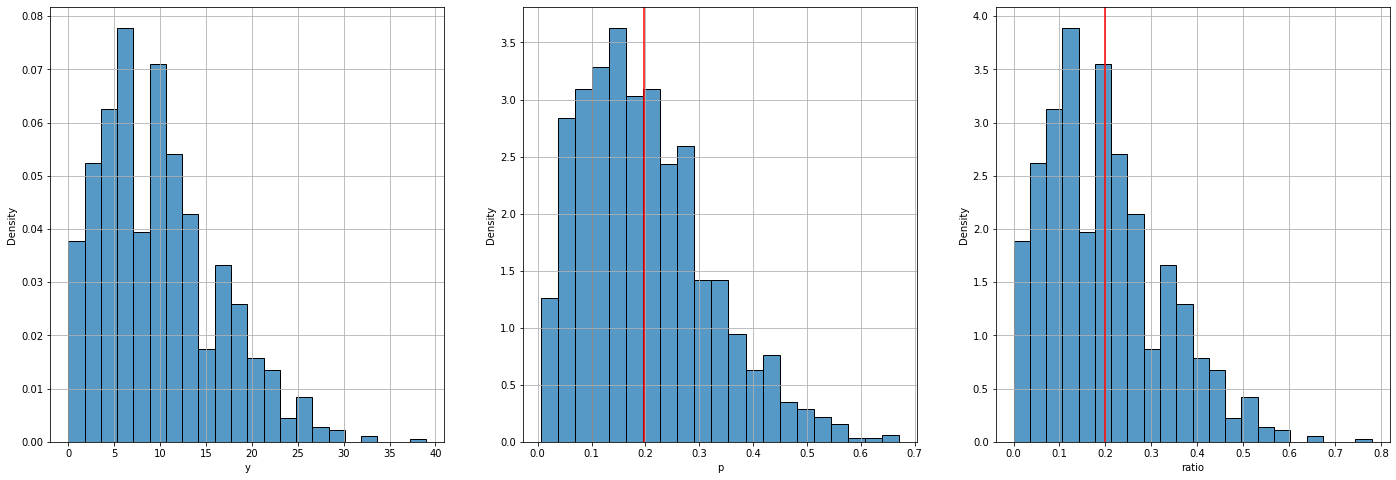

Mean p: 0.19887429492
Mean ratio: 0.19772000000000003



In [103]:
samples1_df["ratio"] = samples1_df["y"] / N
mean_p = samples1_df["p"].mean()
mean_ratio = samples1_df["ratio"].mean()

_, ax = plt.subplots(1, 3, figsize=(24, 8))
sns.histplot(data=samples1_df, x="y", stat="density", ax=ax[0])
ax[0].grid()
sns.histplot(data=samples1_df, x="p", stat="density", ax=ax[1])
ax[1].axvline(mean_ratio, color="r")
ax[1].grid()
sns.histplot(data=samples1_df, x="ratio", stat="density", ax=ax[2])
ax[2].axvline(mean_p, color="r")
ax[2].grid()
plt.show()

print(f"Mean p: {mean_p}\nMean ratio: {mean_ratio}\n")

***The mean ratio is approximately equal to the average a priori, i.e. $\mu=0.2$. It prompts that the built model is proper.***

## Modeling posterior and posterior predictive distribution

In [104]:
gen_quant2 = CmdStanModel(stan_file="code_2.stan")

INFO:cmdstanpy:compiling stan file /home/Lab3/code_2.stan to exe file /home/Lab3/code_2
INFO:cmdstanpy:compiled model executable: /home/Lab3/code_2


In [106]:
N, y, alpha_, beta_ = 50, 7, 2, 8
samples2 = gen_quant2.sample(data={"N": N, "y": y, "alpha_": alpha_, "beta_": beta_})
samples2_df = samples2.draws_pd()
samples2_df

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-26.2329,0.839389,0.960294,1.0,3.0,0.0,27.2066,0.217271,9.0
1,-26.2329,0.911475,0.960294,1.0,1.0,0.0,26.6383,0.217271,9.0
2,-26.2329,0.494334,0.960294,1.0,1.0,0.0,27.6371,0.217271,11.0
3,-25.5842,1.000000,0.960294,1.0,1.0,0.0,26.0440,0.182377,8.0
4,-25.4300,0.965641,0.960294,1.0,3.0,0.0,25.7975,0.133593,10.0
...,...,...,...,...,...,...,...,...,...
3995,-25.3643,0.998546,0.930143,1.0,3.0,0.0,25.9914,0.152767,10.0
3996,-25.3873,0.895678,0.930143,2.0,3.0,0.0,26.1095,0.139941,5.0
3997,-25.3731,0.993651,0.930143,2.0,3.0,0.0,25.4410,0.156771,5.0
3998,-25.4237,0.957835,0.930143,2.0,3.0,0.0,25.6344,0.134363,6.0


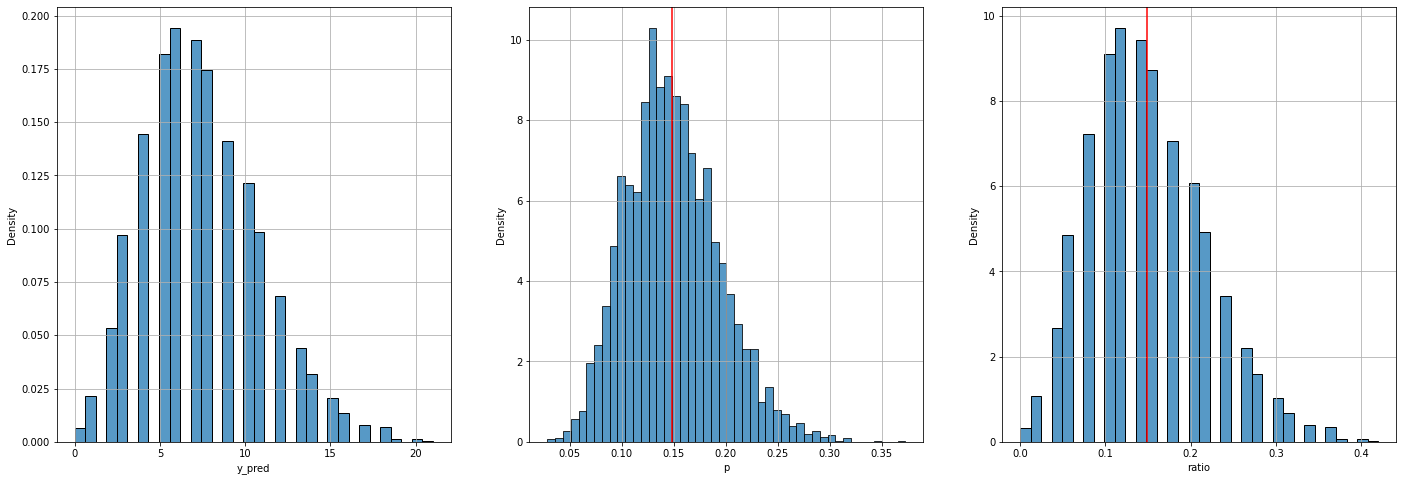

Mean p: 0.1491400309
Mean ratio: 0.148625


In [107]:
samples2_df["ratio"] = samples2_df["y_pred"] / N
mean_p = samples2_df["p"].mean()
mean_ratio = samples2_df["ratio"].mean()

_, ax = plt.subplots(1, 3, figsize=(24, 8))
sns.histplot(data=samples2_df, x="y_pred", stat="density", ax=ax[0])
ax[0].grid()
sns.histplot(data=samples2_df, x="p", stat="density", ax=ax[1])
ax[1].axvline(mean_ratio, color="r")
ax[1].grid()
sns.histplot(data=samples2_df, x="ratio", stat="density", ax=ax[2])
ax[2].axvline(mean_p, color="r")
ax[2].grid()
plt.show()

print(f"Mean p: {mean_p}\nMean ratio: {mean_ratio}")

***Judging by the histograms and the calculations one may notice that the mean of the distribution has been reallocated. New samples has a significant impact on that.***

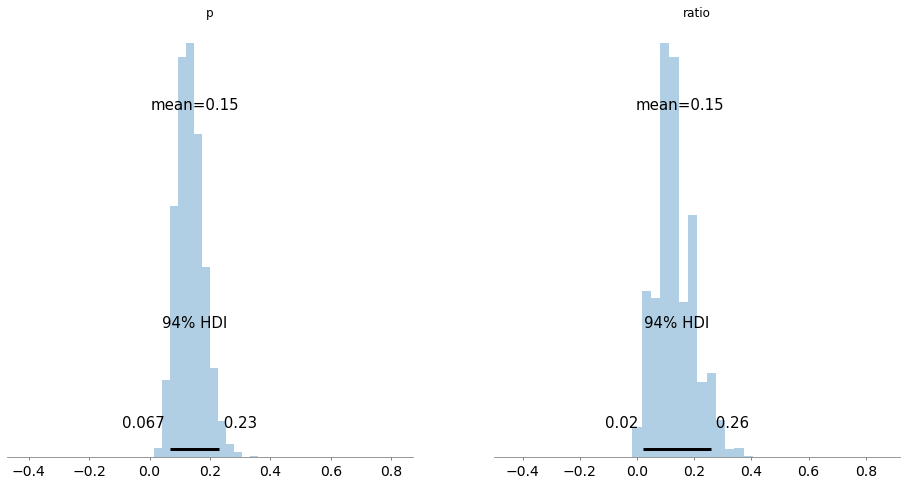

In [112]:
_, ax = plt.subplots(1, 2, figsize=(16, 8))
az.plot_posterior(samples2_df["p"].to_numpy(), kind='hist', hdi_prob=0.94, point_estimate='mean', ax=ax[0])
ax[0].set_title("p")
az.plot_posterior(samples2_df["ratio"].to_numpy(), kind='hist', hdi_prob=0.94, point_estimate='mean', ax=ax[1])
ax[1].set_title("ratio")
plt.show()

In [115]:
p = samples2_df["p"].to_numpy()
ratio = samples2_df["ratio"].to_numpy()
print(f"[p]\nMean: {mean_p}, 94 % HDI: {az.hdi(p, hdi_prob=0.94)}")
print()
print(f"[Ratio]\nMean: {mean_ratio}, 94 % HDI: {az.hdi(ratio, hdi_prob=0.94)}")

[p]
Mean: 0.1491400309, 94 % HDI: [0.0673038 0.230127 ]

[Ratio]
Mean: 0.148625, 94 % HDI: [0.02 0.26]


***The expected value of parameter $p$ is equal to $0.1491$, whereas the $94$ % density interval is: $[0.0673, 0.2301]$. In comparison, the expected value of the predicted ratio is equal to $0.1486$, whereas the $94$ % density interval is: $[0.02, 0.26]$.***

In [118]:
print(f"Probability that ratio is lower than the average probability from traditional vaccines: {np.mean(ratio < 0.2) * 100.0} %")

Probability that ratio is lower than the average probability from traditional vaccines: 74.325 %


***Probability that ratio is lower than the average probability from traditional vaccines is equal to $74.325 %.***